# Data Cleaning

In [1]:
#--นำเข้าข้อมูลดิบ (Raw Data) ---
import pandas as pd
file_path = 'Current health expenditure.csv'
df = pd.read_csv(file_path)

print("1. ข้อมูลดิบ (Raw Data)แสดง 5 แถวแรก")
print(df.head())
#2. ค้นหาคอลัมน์ที่เป็นปี (เช่น '2000', '2001', ...)
#เราจะหาคอลัมน์ที่เป็นตัวเลข (ปี) อัตโนมัติ
year_cols = [col for col in df.columns if col.isdigit()]

#3. กำหนดคอลัมน์เป้าหมายที่จะเก็บไว้
#นี่คือคอลัมน์ "ทั้งหมด" ที่เราต้องการเก็บไว้
target_cols = ['Country Code', 'IncomeGroup'] + year_cols

print(f"2. คอลัมน์เป้าหมายที่จะเก็บไว้ ({len(target_cols)} คอลัมน์)")
print(target_cols)

1. ข้อมูลดิบ (Raw Data)แสดง 5 แถวแรก
                  Country Name          IncomeGroup Country Code      2000  \
0                        Aruba          High income          ABW       NaN   
1  Africa Eastern and Southern                  NaN          AFE  5.654027   
2                  Afghanistan           Low income          AFG       NaN   
3   Africa Western and Central                  NaN          AFW  3.462852   
4                       Angola  Lower middle income          AGO  1.908599   

       2001      2002      2003      2004      2005       2006  ...      2013  \
0       NaN       NaN       NaN       NaN       NaN        NaN  ...       NaN   
1  5.813231  5.442299  6.023682  6.109320  5.955198   5.972892  ...  6.161271   
2       NaN  9.443391  8.941258  9.808474  9.948289  10.622766  ...  8.805964   
3  3.486867  3.140402  4.437640  4.279378  4.132311   4.060231  ...  3.609185   
4  4.483516  3.329461  3.547973  3.967199  2.852195   2.685535  ...  2.732827   

       

In [2]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ (ลบคอลัมน์อื่นทิ้ง)
#เราจะเลือกเฉพาะ target_cols และใช้ .copy() เพื่อป้องกัน Warning
df_focused = df[target_cols].copy()

print("3. ข้อมูลหลังเลือกเฉพาะคอลัมน์ (ยังไม่ลบ NaN) ---")
print(df_focused.head())

3. ข้อมูลหลังเลือกเฉพาะคอลัมน์ (ยังไม่ลบ NaN) ---
  Country Code          IncomeGroup      2000      2001      2002      2003  \
0          ABW          High income       NaN       NaN       NaN       NaN   
1          AFE                  NaN  5.654027  5.813231  5.442299  6.023682   
2          AFG           Low income       NaN       NaN  9.443391  8.941258   
3          AFW                  NaN  3.462852  3.486867  3.140402  4.437640   
4          AGO  Lower middle income  1.908599  4.483516  3.329461  3.547973   

       2004      2005       2006      2007  ...      2013      2014  \
0       NaN       NaN        NaN       NaN  ...       NaN       NaN   
1  6.109320  5.955198   5.972892  5.994838  ...  6.161271  5.820881   
2  9.808474  9.948289  10.622766  9.904675  ...  8.805964  9.528878   
3  4.279378  4.132311   4.060231  3.845552  ...  3.609185  3.637259   
4  3.967199  2.852195   2.685535  2.974391  ...  2.732827  2.434129   

        2015       2016       2017       2018   

In [3]:
#ลบแถวที่มีค่าว่าง (NaN)
#.dropna() จะลบแถวใดก็ตามที่มีค่าว่าง "อย่างน้อยหนึ่งช่อง" ในแถวนั้น
rows_before = len(df_focused)
df_final = df_focused.dropna()
rows_after = len(df_final)

print(f"4. ลบแถวที่มีค่าว่าง (NaN)")
print(f"จำนวนแถว (ก่อนลบ NaN): {rows_before}")
print(f"จำนวนแถว (หลังลบ NaN): {rows_after}")
print("\n")

#ผลลัพธ์สุดท้าย
print("5. ข้อมูลที่ Clean แล้ว (Final Data)")
print(df_final.head())
print("\n")
df_final.info()

4. ลบแถวที่มีค่าว่าง (NaN)
จำนวนแถว (ก่อนลบ NaN): 266
จำนวนแถว (หลังลบ NaN): 184


5. ข้อมูลที่ Clean แล้ว (Final Data)
  Country Code          IncomeGroup      2000      2001      2002      2003  \
4          AGO  Lower middle income  1.908599  4.483516  3.329461  3.547973   
5          ALB  Upper middle income  5.944198  5.925845  5.664645  5.911408   
6          AND          High income  5.952764  5.858237  5.996212  5.547715   
8          ARE          High income  2.395045  2.484364  2.717709  2.646344   
9          ARG  Upper middle income  8.220011  8.371799  7.393312  6.894516   

       2004      2005      2006      2007  ...      2013      2014       2015  \
4  3.967199  2.852195  2.685535  2.974391  ...  2.732827  2.434129   2.605795   
5  5.893649  5.729545  5.631770  5.926091  ...  6.282863  6.434511   6.464119   
6  5.288469  5.594769  4.965300  4.923473  ...  6.799642  6.773080   6.915864   
8  2.462256  2.320211  2.325414  2.566027  ...  3.502222  3.534055   3.466094   


In [4]:
#เราจะ Melt df_final (ที่ Clean แล้ว)
print("6. กำลัง 'Melt' ข้อมูล (Wide to Long) เพื่อเตรียมพล็อตกราฟ...")
df_long = df_final.melt(
    id_vars=['Country Code', 'IncomeGroup'], #คอลัมน์ที่จะคงไว้
    var_name='Year',                      #คอลัมน์ใหม่สำหรับ "ปี"
    value_name='Expenditure (% GDP)'      #คอลัมน์ใหม่สำหรับ "ค่า"
)

#แปลง 'Year' (ที่เป็น Text) ให้เป็น 'ตัวเลข'
df_long['Year'] = pd.to_numeric(df_long['Year'])

print("ข้อมูลที่พร้อมสำหรับพล็อตกราฟ (Long Format):")
print(df_long.head())

6. กำลัง 'Melt' ข้อมูล (Wide to Long) เพื่อเตรียมพล็อตกราฟ...
ข้อมูลที่พร้อมสำหรับพล็อตกราฟ (Long Format):
  Country Code          IncomeGroup  Year  Expenditure (% GDP)
0          AGO  Lower middle income  2000             1.908599
1          ALB  Upper middle income  2000             5.944198
2          AND          High income  2000             5.952764
3          ARE          High income  2000             2.395045
4          ARG  Upper middle income  2000             8.220011


# การวิเคราะห์แนวโน้มและการเปรียบเทียบด้วย Line Plot (Trend Analysis)

จุดประสงค์ในการวิเคราะห์
1.ใช้กราฟในการวิเคราะห์แนวโน้มของ %GDP heath

----พล็อตที่ 1: การวิเคราะห์แนวโน้ม (Trend) ตามกลุ่มรายได้() ด้วยคอลัม Income Group---

---พล็อตที่ 2: เปรียบเทียบ (Benchmark) ประเทศไทย 'THA'กับ กลุ่มประเทศรายได้ปานกลางค่อนข้างต่ำ---

---พล็อตที่ 1: การวิเคราะห์แนวโน้ม (Trend) ตามกลุ่มรายได้ ---


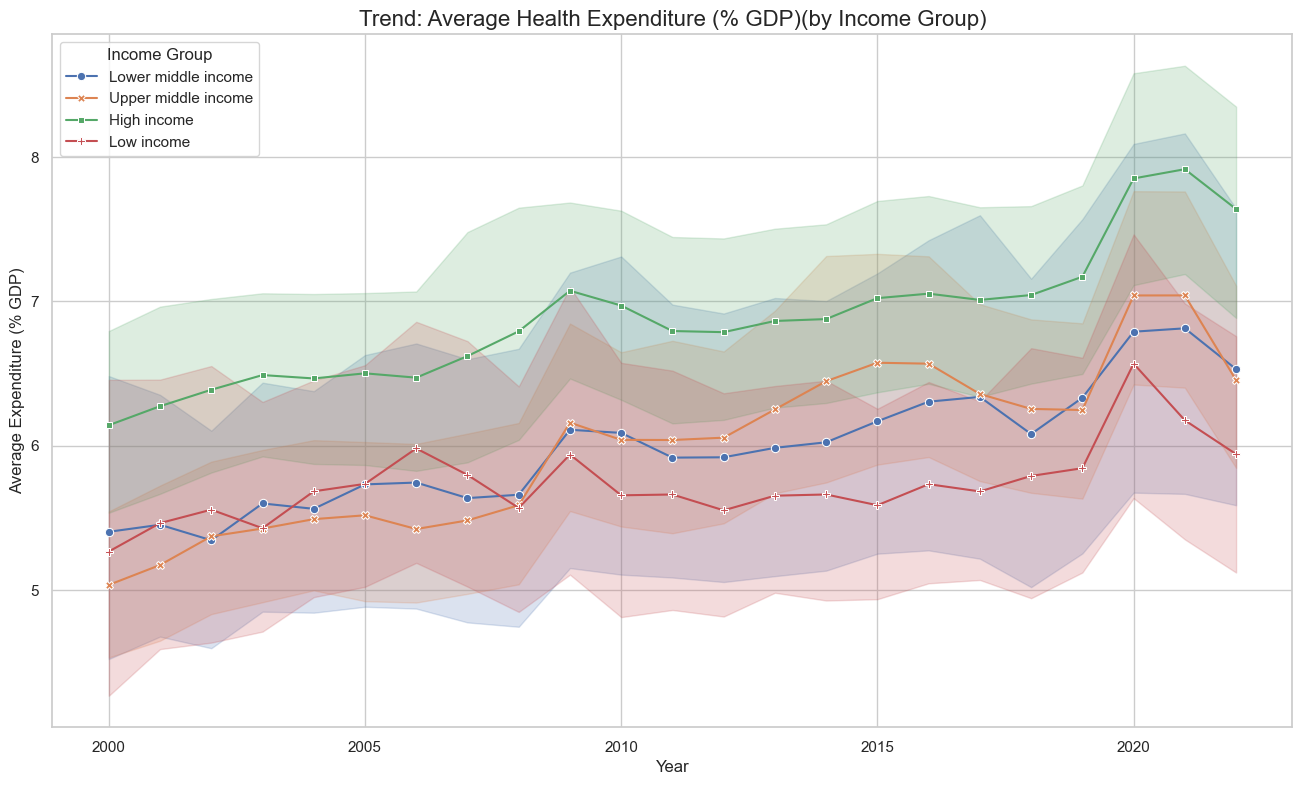

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print("---พล็อตที่ 1: การวิเคราะห์แนวโน้ม (Trend) ตามกลุ่มรายได้ ---")

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid")

#sns.lineplot()จะคำนวณ "ค่าเฉลี่ย" ของแต่ละกลุ่มโดยอัตโนมัติ
#แสดง "ช่วงความเชื่อมั่น" (แถบสีจางๆ) รอบเส้น
sns.lineplot(
    data=df_long,
    x='Year',                     #แกน X เป็น ปี
    y='Expenditure (% GDP)',      #แกน Y เป็น ค่าใช้จ่่าย
    hue='IncomeGroup',            #แยกสีตาม "กลุ่มรายได้"
    style='IncomeGroup',          #(Optional) ให้สไตล์เส้นต่างกันด้วย
    markers=True,                 #(Optional) เพิ่มจุดมาร์กเกอร์
    dashes=False
)

plt.title('Trend: Average Health Expenditure (% GDP)(by Income Group)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Expenditure (% GDP)', fontsize=12)
plt.legend(title='Income Group')
plt.grid(True) #เปิด Gridline

plt.show()

สรุป : จากกราฟเปรียบเทียบรายจ่ายด้านสุขภาพ (% of GDP) ระหว่างปี 2000-2022 พบว่า กลุ่มประเทศทั้ง 4 ระดับรายได้ มีแนวโน้มการใช้จ่ายที่สอดคล้องกับระดับการพัฒนาเศรษฐกิจ โดยกลุ่ม High income มีสัดส่วนการใช้จ่ายสูงที่สุด รองลงมาเป็น Upper-middle income , Lower-middle income และ Low income ตามลำดับ

ในช่วงปี 2008 สังเกตเห็นว่ากลุ่ม Low income มีการลดลงของ "สัดส่วน" รายจ่ายด้านสุขภาพ ซึ่งสะท้อนว่าในช่วงเวลานั้น การใช้จ่ายด้านสุขภาพอาจเติบโตไม่ทันหรืออาจมีการตัดลดงบประมาณด้านสุขภาพ"

---พล็อตที่ 2: เปรียบเทียบ (Benchmark) ประเทศไทย 'THA' ---


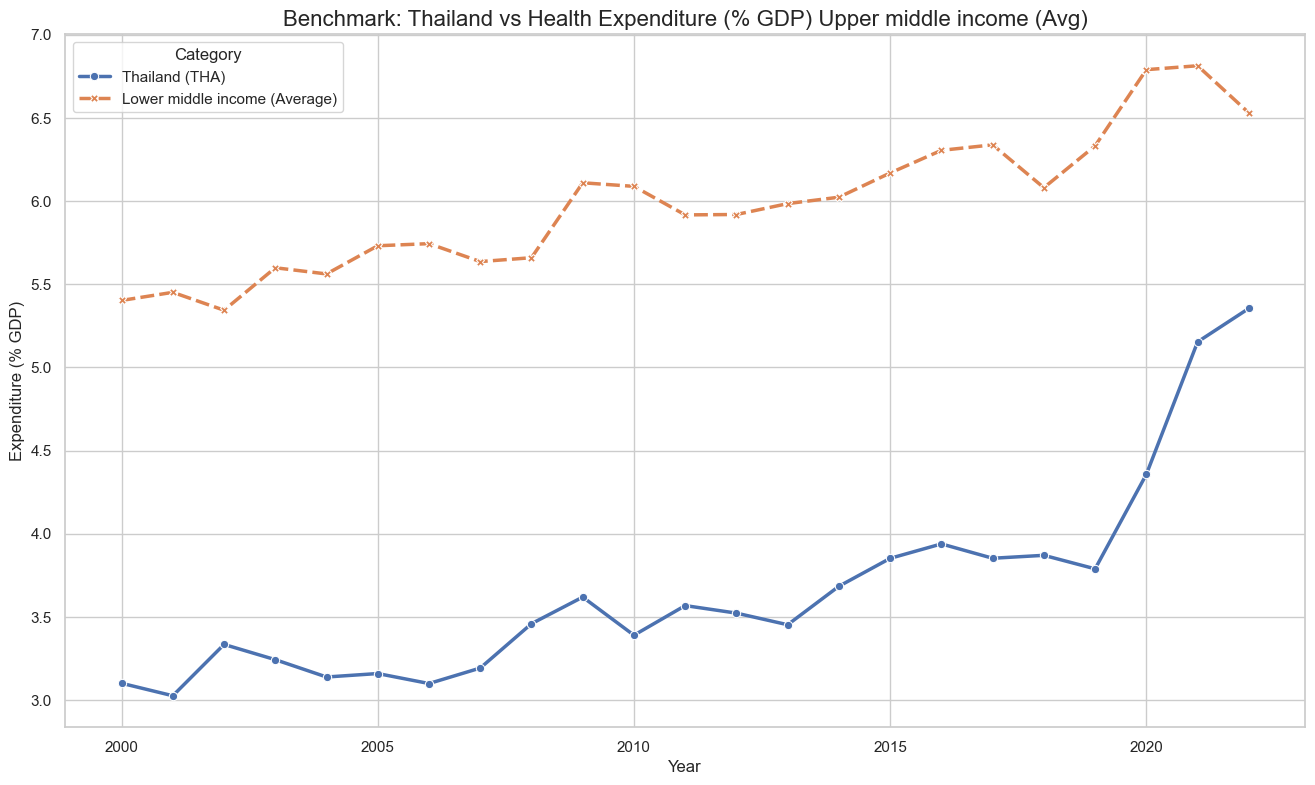

In [6]:
print("---พล็อตที่ 2: เปรียบเทียบ (Benchmark) ประเทศไทย 'THA' ---")

#เตรียมข้อมูล 'ประเทศไทย' ---
df_tha = df_long[df_long['Country Code'] == 'THA'].copy()
#เพิ่มคอลัมน์ 'Category' เพื่อใช้แยกสีในกราฟ)
df_tha['Category'] = 'Thailand (THA)'

#เตรียมข้อมูล 'ค่าเฉลี่ยกลุ่ม' ---
group_to_compare = 'Lower middle income'
df_group = df_long[df_long['IncomeGroup'] == group_to_compare].copy()

#(สำคัญ) คำนวณ "ค่าเฉลี่ย" ของกลุ่มนี้ในแต่ละปี
df_group_avg = df_group.groupby('Year')['Expenditure (% GDP)'].mean().reset_index()
df_group_avg['Category'] = f'{group_to_compare} (Average)'

#รวมสองตารางเข้าด้วยกัน ---
df_benchmark = pd.concat([df_tha, df_group_avg])

#พล็อตกราฟเปรียบเทียบ ---
plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid")

sns.lineplot(
    data=df_benchmark,
    x='Year',
    y='Expenditure (% GDP)',
    hue='Category',   #แยกสีระหว่าง 'THA' และ 'ค่าเฉลี่ยกลุ่ม'
    style='Category', #ให้สไตล์เส้นต่างกัน
    markers=True,
    linewidth=2.5     #เพิ่มความหนาของเส้น
)

plt.title('Benchmark: Thailand vs Health Expenditure (% GDP) Upper middle income (Avg)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Expenditure (% GDP)', fontsize=12)
plt.legend(title='Category')
plt.grid(True)

plt.show()

สรุป : ข้อมูลจากกราฟสะท้อนว่า แม้ประเทศไทยจะอยู่ในกลุ่มประเทศรายได้กลุ่มประเทศรายได้ปานกลางค่อนข้างต่ำ (Lower middle income) (ข้อมูลในปี2000-2022) แต่สัดส่วนการใช้จ่ายด้านสุขภาพ GDP (% of GDP) ยังคงอยู่ในระดับที่ต่ำกว่าค่าเฉลี่ยของกลุ่ม ซึ่งชี้ให้เห็นถึงช่องว่างในการจัดสรรทรัพยากรเข้าสู่ระบบสุขภาพ เมื่อเทียบกับประเทศที่มีระดับการพัฒนาเศรษฐกิจใกล้เคียงกัน